### Exploratory Data Analysis for Data Analysts in the US

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Filter for US Data Analyst roles

In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

#### Locations to Explore:


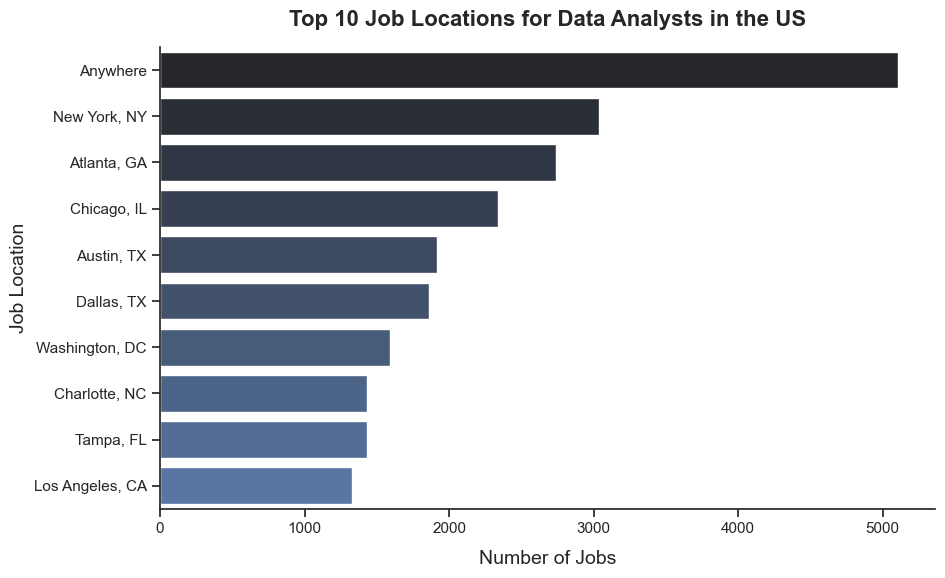

In [3]:
# Get top 10 job locations and reset index
df_plot = df_DA_US['job_location'].value_counts().head(10).reset_index()

# Set Seaborn theme
sns.set_theme(style='ticks')

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='count', y='job_location', hue='job_location', palette='dark:b', legend=False)

# Remove top and right spines
sns.despine()

# Add labels and title
plt.title('Top 10 Job Locations for Data Analysts in the US', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Jobs', fontsize=14, labelpad=10)
plt.ylabel('Job Location', fontsize=14)

# Show the plot
plt.show()

#### Job Opportunities

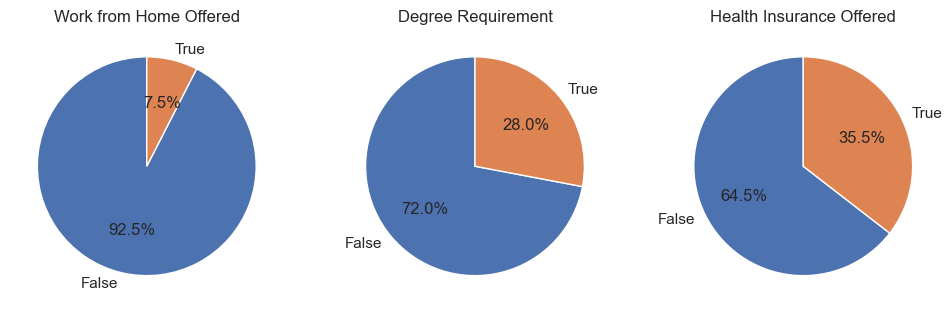

In [7]:
# Dictionary with column names and titles
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create subplots
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

# Loop through the dictionary and create a pie chart for each column
for i, (column, title) in enumerate(dict_column.items()):
    # Generate pie chart for each feature
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# Show the plot
plt.show()


#### Companies to Explore:

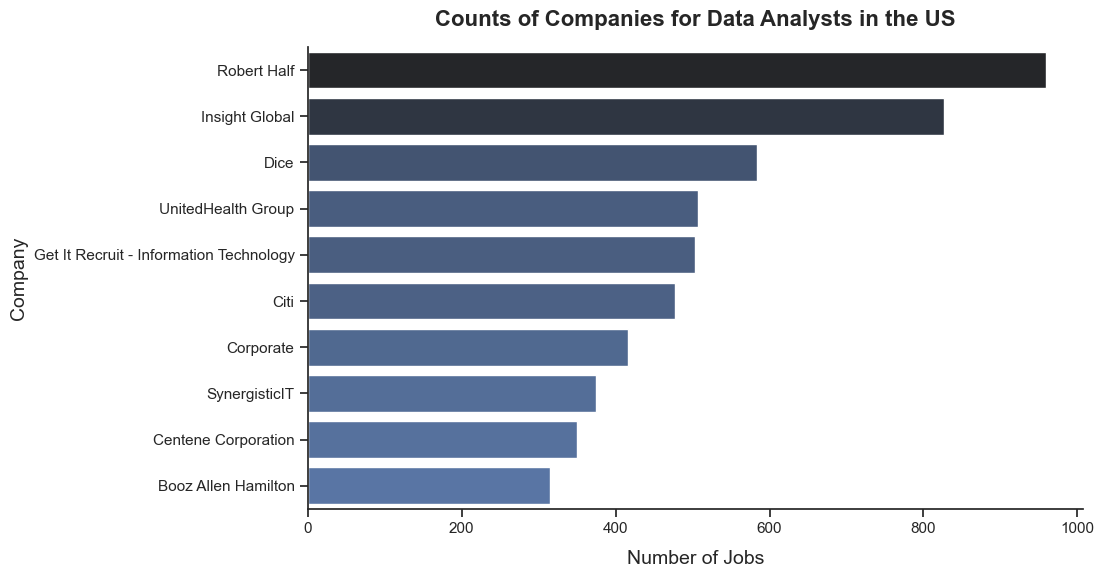

In [4]:
# Get the top 10 companies by job count and reset the index
df_plot = df_DA_US['company_name'].value_counts().head(10).reset_index()

# Set Seaborn theme
sns.set_theme(style='ticks')

# Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')

# Remove top and right spines
sns.despine()

# Remove legend
plt.legend([],[], frameon=False)

# Add labels and title
plt.title('Counts of Companies for Data Analysts in the US', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Jobs', fontsize=14, labelpad=10)
plt.ylabel('Company', fontsize=14)

# Show the plot
plt.show()